In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the production and supply CSV files into pandas DataFrames
production_data = pd.read_csv('Africa Food Production (2004 - 2013).csv')
supply_data = pd.read_csv('Africa Food Supply (2004 - 2013).csv')



In [10]:
production_data.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [11]:
supply_data.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [12]:

# Extract relevant columns from production data
production_data = production_data[['Country', 'Year', 'Value']]

In [13]:
# Convert 'Value' column to numeric in production data
production_data['Value'] = pd.to_numeric(production_data['Value'], errors='coerce')


In [14]:
# Calculate average and median food production per year
average_production = production_data.groupby('Year')['Value'].mean()
median_production = production_data.groupby('Year')['Value'].median()

In [15]:
average_production 
median_production

Year
2004    16
2005    16
2006    17
2007    17
2008    18
2009    18
2010    20
2011    21
2012    21
2013    22
Name: Value, dtype: int64

In [16]:
# Extract relevant columns from supply data
supply_data = supply_data[['Country', 'Year', 'Value']]

# Convert 'Value' column to numeric in supply data
supply_data['Value'] = pd.to_numeric(supply_data['Value'], errors='coerce')

In [17]:
# Calculate average food supply per year
average_supply = supply_data.groupby('Year')['Value'].mean()
average_supply

Year
2004    2394.222222
2005    2409.288889
2006    2430.800000
2007    2447.755556
2008    2460.755556
2009    2482.222222
2010    2497.400000
2011    2515.422222
2012    2527.644444
2013    2532.244444
Name: Value, dtype: float64

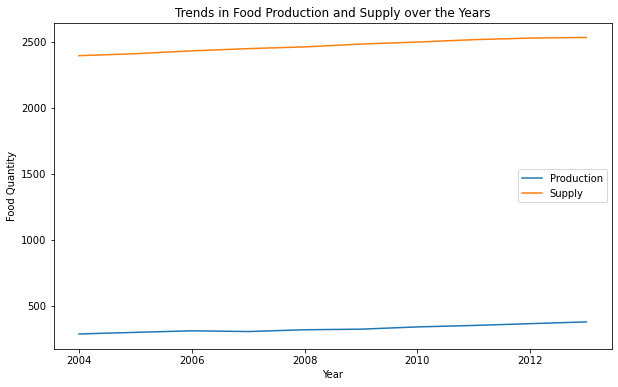

In [18]:
# Plotting trends in food production and supply over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=production_data, x='Year', y='Value', ci=None, label='Production')
sns.lineplot(data=supply_data, x='Year', y='Value', ci=None, label='Supply')
plt.title('Trends in Food Production and Supply over the Years')
plt.xlabel('Year')
plt.ylabel('Food Quantity')
plt.legend()
plt.show()

In [19]:
# Calculate quartiles and interquartile range for production data
quartiles_production = production_data.groupby('Year')['Value'].quantile([0.25, 0.75]).unstack()
quartiles_production.columns = ['Q1', 'Q3']
quartiles_production['IQR'] = quartiles_production['Q3'] - quartiles_production['Q1']


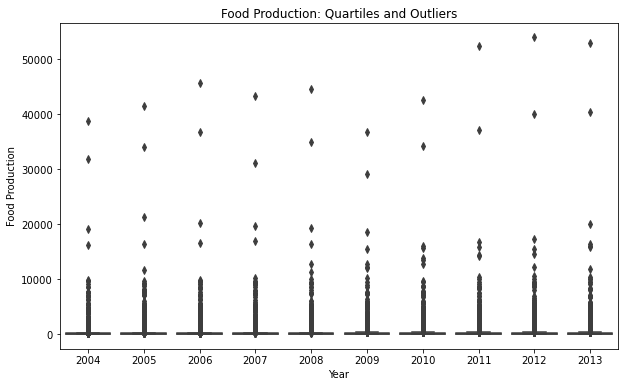

In [20]:
# Boxplot for food production
plt.figure(figsize=(10, 6))
sns.boxplot(data=production_data, x='Year', y='Value')
plt.title('Food Production: Quartiles and Outliers')
plt.xlabel('Year')
plt.ylabel('Food Production')
plt.show()

In [21]:
# Calculate quartiles and interquartile range for supply data
quartiles_supply = supply_data.groupby('Year')['Value'].quantile([0.25, 0.75]).unstack()
quartiles_supply.columns = ['Q1', 'Q3']
quartiles_supply['IQR'] = quartiles_supply['Q3'] - quartiles_supply['Q1']

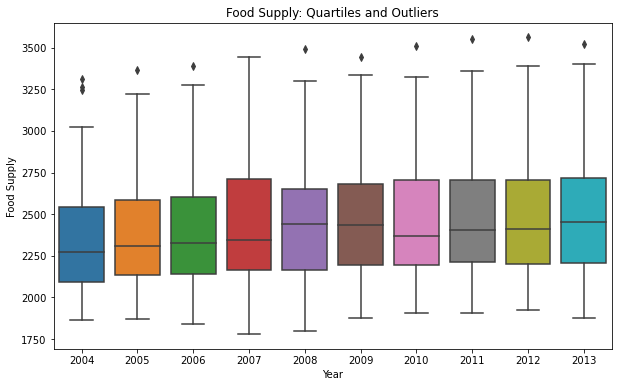

In [22]:
# Boxplot for food supply
plt.figure(figsize=(10, 6))
sns.boxplot(data=supply_data, x='Year', y='Value')
plt.title('Food Supply: Quartiles and Outliers')
plt.xlabel('Year')
plt.ylabel('Food Supply')
plt.show()

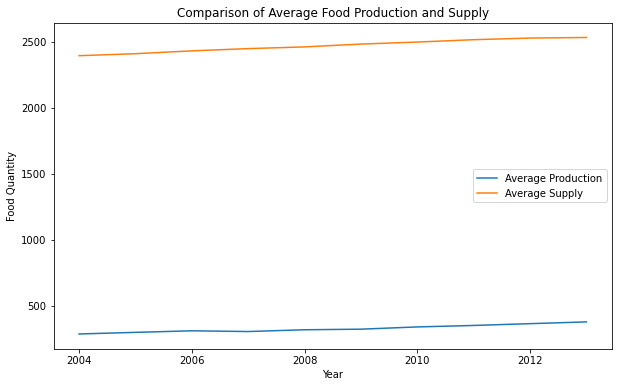

In [23]:
# Plotting a comparison between average food production and supply for each year
plt.figure(figsize=(10, 6))
plt.plot(average_production.index, average_production.values, label='Average Production')
plt.plot(average_supply.index, average_supply.values, label='Average Supply')
plt.title('Comparison of Average Food Production and Supply')
plt.xlabel('Year')
plt.ylabel('Food Quantity')
plt.legend()
plt.show()

In [24]:
# Calculate total food production and supply per year for each country
total_production_per_country = production_data.groupby(['Country', 'Year'])['Value'].sum().unstack().fillna(0)
total_supply_per_country = supply_data.groupby(['Country', 'Year'])['Value'].sum().unstack().fillna(0)


<Figure size 720x432 with 0 Axes>

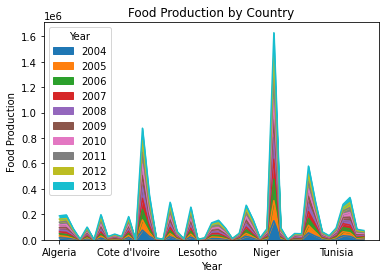

<Figure size 720x432 with 0 Axes>

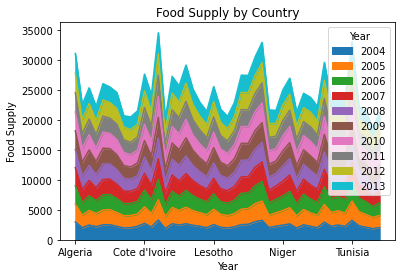

In [25]:
# Create a stacked area plot for food production
plt.figure(figsize=(10, 6))
total_production_per_country.plot.area(stacked=True)
plt.title('Food Production by Country')
plt.xlabel('Year')
plt.ylabel('Food Production')
plt.show()

# Create a stacked area plot for food supply
plt.figure(figsize=(10, 6))
total_supply_per_country.plot.area(stacked=True)
plt.title('Food Supply by Country')
plt.xlabel('Year')
plt.ylabel('Food Supply')
plt.show()

In [26]:
import pandas as pd


# Filter the data for the years 2004 to 2006 (inclusive)
filtered_data = supply_data[(supply_data['Year'] >= 2004) & (supply_data['Year'] <= 2006)]

# Calculate the average supply for each country
average_supply = filtered_data.groupby('Country')['Value'].mean()

# Get the three countries with the lowest food supply
lowest_supply_countries = average_supply.nsmallest(3)

# Print the result
print(lowest_supply_countries)

Country
Zambia                      1859.000000
Ethiopia                    1942.333333
Central African Republic    2014.666667
Name: Value, dtype: float64


In [27]:
# Filter the data for the year 2010 and the item "oats"
filtered_data = production_data[(production_data['Year'] == 2010) & (production_data['Item'] == 'Oats')]

# Find the country with the highest production of oats in 2010
highest_oats_country = filtered_data.loc[filtered_data['Value'].idxmax(), 'Country']

# Print the result
print(highest_oats_country)

Algeria


In [29]:
# Filter the data for the item "Rice"
rice_data = production_data[production_data['Item'] == 'Rice']

# Group the data by country and calculate the total rice production
total_rice_production = rice_data.groupby('Country')['Value'].sum()

# Get the three countries with the highest total rice production
highest_rice_countries = total_rice_production.nlargest(3)

# Print the result
print(highest_rice_countries)

Series([], Name: Value, dtype: int64)
